Author: Denny Sanjaya

# Import Libraries

In [1]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as py

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (12, 4)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'small'
rcParams['ytick.labelsize'] = 'small'

In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Load Dataset

In [4]:
#Load Dataset
dt = pd.read_csv('loan_customer.csv')

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

# Data Cleansing

## Handling missing values

In [6]:
dt.isna().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

has_credit_card memiliki 533 data Null / 86%, sehingga diputuskan menghapus kolom tsb

In [7]:
hmv = dt.drop('has_credit_card', axis =1)

In [8]:
hmv.isna().sum()

loan_id                0
birth_date            49
phone_number          52
gender                13
married                3
dependents            16
education              1
self_employed         33
applicant_income       9
coapplicant_income     0
loan_amount            0
loan_term_month        0
loan_term_year         0
credit_history        51
property_type          1
loan_status            0
dtype: int64

In [9]:
hmv2 = hmv.fillna(
{"property_type": hmv['property_type'].mode()[0], 
 "self_employed": hmv['self_employed'].mode()[0],
 "dependents": hmv['dependents'].mode()[0],
 "gender": hmv['gender'].mode()[0],
 "applicant_income": round(hmv['applicant_income'].mean(), 1),
 "education": hmv['education'].mode()[0],
 "married": hmv['married'].mode()[0],
 "credit_history": hmv['credit_history'].mode()[0]
})
hmv2.isna().sum()

loan_id                0
birth_date            49
phone_number          52
gender                 0
married                0
dependents             0
education              0
self_employed          0
applicant_income       0
coapplicant_income     0
loan_amount            0
loan_term_month        0
loan_term_year         0
credit_history         0
property_type          0
loan_status            0
dtype: int64

In [10]:
hmv3 = hmv2.dropna()
hmv3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 619
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             525 non-null    object 
 1   birth_date          525 non-null    object 
 2   phone_number        525 non-null    float64
 3   gender              525 non-null    object 
 4   married             525 non-null    object 
 5   dependents          525 non-null    object 
 6   education           525 non-null    object 
 7   self_employed       525 non-null    object 
 8   applicant_income    525 non-null    float64
 9   coapplicant_income  525 non-null    float64
 10  loan_amount         525 non-null    int64  
 11  loan_term_month     525 non-null    int64  
 12  loan_term_year      525 non-null    int64  
 13  credit_history      525 non-null    float64
 14  property_type       525 non-null    object 
 15  loan_status         525 non-null    object 
dtypes: float

## Handling duplicated data

In [11]:
hmv.duplicated().sum()

5

In [12]:
hmv3.drop_duplicates(inplace=True)

C:\Users\Denny\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [13]:
hdp = hmv3
hdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 619
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             520 non-null    object 
 1   birth_date          520 non-null    object 
 2   phone_number        520 non-null    float64
 3   gender              520 non-null    object 
 4   married             520 non-null    object 
 5   dependents          520 non-null    object 
 6   education           520 non-null    object 
 7   self_employed       520 non-null    object 
 8   applicant_income    520 non-null    float64
 9   coapplicant_income  520 non-null    float64
 10  loan_amount         520 non-null    int64  
 11  loan_term_month     520 non-null    int64  
 12  loan_term_year      520 non-null    int64  
 13  credit_history      520 non-null    float64
 14  property_type       520 non-null    object 
 15  loan_status         520 non-null    object 
dtypes: float

# Handling Outlier

In [14]:
hdp.sample(5)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
245,LP001811,1986-06-13,6.287738e+11,Male,Yes,0,Not Graduate,No,3406.0,4417.0,123000,360,30,1.0,apartment,APPROVE
15,LP001032,1989-09-07,6.287747e+11,Male,No,0,Graduate,No,4950.0,0.0,125000,360,30,1.0,house,APPROVE
69,LP001241,1978-01-31,6.285741e+11,Female,No,0,Graduate,No,4300.0,0.0,136000,360,30,0.0,apartment,REJECT
152,LP001529,1983-01-15,6.287775e+11,Male,Yes,0,Graduate,Yes,2577.0,3750.0,152000,360,30,1.0,studio,APPROVE
580,LP002868,1984-02-14,6.281116e+11,Male,Yes,2,Graduate,No,3159.0,461.0,108000,84,7,1.0,house,APPROVE


In [15]:
korelasi = hdp.corr()
korelasi

,phone_number,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history
phone_number,1.000000,0.021574,-0.032482,0.064348,-0.006830,-0.006830,-0.003948
applicant_income,0.021574,1.000000,-0.091776,0.395983,-0.026145,-0.026145,-0.002300
coapplicant_income,-0.032482,-0.091776,1.000000,0.149727,-0.018473,-0.018473,-0.017082
loan_amount,0.064348,0.395983,0.149727,1.000000,0.034026,0.034026,-0.010619
loan_term_month,-0.006830,-0.026145,-0.018473,0.034026,1.000000,1.000000,-0.010690
loan_term_year,-0.006830,-0.026145,-0.018473,0.034026,1.000000,1.000000,-0.010690
credit_history,-0.003948,-0.002300,-0.017082,-0.010619,-0.010690,-0.010690,1.000000


In [16]:
hdp.describe()

,phone_number,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history
count,5.200000e+02,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,5.446169e+11,5810.213462,1543.484462,146640.384615,343.338462,28.611538,0.853846
std,2.010528e+11,9619.855586,2428.601325,85352.761727,64.369305,5.364109,0.353601
min,6.281101e+10,150.000000,0.000000,9000.000000,12.000000,1.000000,0.000000
25%,6.281137e+11,2919.250000,0.000000,100750.000000,360.000000,30.000000,1.000000
50%,6.281342e+11,3866.000000,1125.500000,125000.000000,360.000000,30.000000,1.000000
75%,6.285673e+11,5834.000000,2277.000000,168500.000000,360.000000,30.000000,1.000000
max,6.287799e+11,170578.000000,33837.000000,700000.000000,480.000000,40.000000,1.000000


<AxesSubplot:>

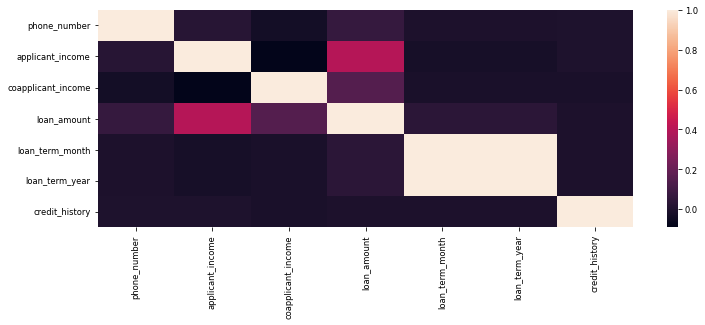

In [17]:
sns.heatmap(korelasi)

In [18]:
nums = ['applicant_income', 'coapplicant_income','loan_amount']

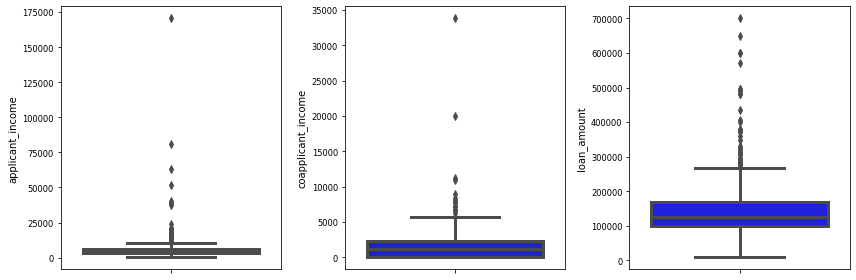

In [19]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=hdp[nums[i]], color='blue', orient='v')
    plt.tight_layout()

C:\Users\Denny\AppData\Local\Temp/ipykernel_13208/2799010522.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, len(nums)/2, i+1)
C:\Users\Denny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Denny\AppData\Local\Temp/ipykernel_13208/2799010522.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, len(nums)/2, i+1)
C:\Users\Denny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated fun

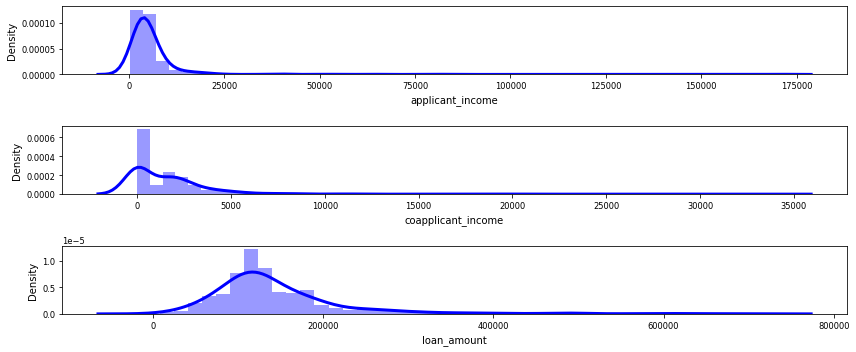

In [20]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.distplot(hdp[nums[i]], color='blue')
    plt.tight_layout()

In [21]:
#Mencari outlier pada applicant_income
print('---applicant_income---')
Q1, Q3 = np.percentile(hdp['applicant_income'],[25,75])
IQR = Q3 - Q1
low = Q1 - (1.5 * IQR)
high = Q3 + (1.5 * IQR)
print(Q1)
print(Q3)
print(IQR)
print(low)
print(high)
hdp[(hdp['applicant_income'] <= low) | (hdp['applicant_income'] >= high)].count()
hdp.info()

---applicant_income---
2919.25
5834.0
2914.75
-1452.875
10206.125
<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 619
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             520 non-null    object 
 1   birth_date          520 non-null    object 
 2   phone_number        520 non-null    float64
 3   gender              520 non-null    object 
 4   married             520 non-null    object 
 5   dependents          520 non-null    object 
 6   education           520 non-null    object 
 7   self_employed       520 non-null    object 
 8   applicant_income    520 non-null    float64
 9   coapplicant_income  520 non-null    float64
 10  loan_amount         520 non-null    int64  
 11  loan_term_month     520 non-null    int64  
 12  loan_term_year      520 non-null    int64  
 13  credit_history      520 non-null    float64
 14  property_type       520 non-null    obje

In [22]:
#Mengambil data applicant_income yang tidak outlier
ho = hdp[(hdp['applicant_income'] >= low) & (hdp['applicant_income'] <= high)]
ho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 619
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             478 non-null    object 
 1   birth_date          478 non-null    object 
 2   phone_number        478 non-null    float64
 3   gender              478 non-null    object 
 4   married             478 non-null    object 
 5   dependents          478 non-null    object 
 6   education           478 non-null    object 
 7   self_employed       478 non-null    object 
 8   applicant_income    478 non-null    float64
 9   coapplicant_income  478 non-null    float64
 10  loan_amount         478 non-null    int64  
 11  loan_term_month     478 non-null    int64  
 12  loan_term_year      478 non-null    int64  
 13  credit_history      478 non-null    float64
 14  property_type       478 non-null    object 
 15  loan_status         478 non-null    object 
dtypes: float

In [23]:
#Mencari outlier pada loan_amount dari data applicant_income yang tidak outlier
print('---loan_amount---')
Q1, Q3 = np.percentile(ho['loan_amount'],[25,75])
IQR = Q3 - Q1
low = Q1 - (1.5 * IQR)
high = Q3 + (1.5 * IQR)
print(Q1)
print(Q3)
print(IQR)
print(low)
print(high)
ho[(ho['loan_amount'] <= low) | (ho['loan_amount'] >= high)].count()

---loan_amount---
100000.0
158000.0
58000.0
13000.0
245000.0


loan_id               28
birth_date            28
phone_number          28
gender                28
married               28
dependents            28
education             28
self_employed         28
applicant_income      28
coapplicant_income    28
loan_amount           28
loan_term_month       28
loan_term_year        28
credit_history        28
property_type         28
loan_status           28
dtype: int64

In [24]:
#Mengambil data loan_amount yang tidak outlier
ho1 = ho[(ho['loan_amount'] >= low) & (ho['loan_amount'] <= high)]
ho1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 619
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             450 non-null    object 
 1   birth_date          450 non-null    object 
 2   phone_number        450 non-null    float64
 3   gender              450 non-null    object 
 4   married             450 non-null    object 
 5   dependents          450 non-null    object 
 6   education           450 non-null    object 
 7   self_employed       450 non-null    object 
 8   applicant_income    450 non-null    float64
 9   coapplicant_income  450 non-null    float64
 10  loan_amount         450 non-null    int64  
 11  loan_term_month     450 non-null    int64  
 12  loan_term_year      450 non-null    int64  
 13  credit_history      450 non-null    float64
 14  property_type       450 non-null    object 
 15  loan_status         450 non-null    object 
dtypes: float

In [25]:
#Mencari outlier pada coapplicant_income dari data loan_amount yang tidak outlier
#coapplicant_income
Q1, Q3 = np.percentile(ho1['coapplicant_income'],[25,75])
IQR = Q3 - Q1
low = Q1 - (1.5 * IQR)
high = Q3 + (1.5 * IQR)
print(Q1)
print(Q3)
print(IQR)
print(low)
print(high)
ho1[(ho1['coapplicant_income'] <= low) | (ho1['coapplicant_income'] >= high)].count()

0.0
2252.25
2252.25
-3378.375
5630.625


loan_id               10
birth_date            10
phone_number          10
gender                10
married               10
dependents            10
education             10
self_employed         10
applicant_income      10
coapplicant_income    10
loan_amount           10
loan_term_month       10
loan_term_year        10
credit_history        10
property_type         10
loan_status           10
dtype: int64

In [26]:
#Mengambil data akhir dari loan_amount yang tidak outlier
ho_final = ho1[(ho1['coapplicant_income'] >= low) & (ho1['coapplicant_income'] <= high)]
ho_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 619
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             440 non-null    object 
 1   birth_date          440 non-null    object 
 2   phone_number        440 non-null    float64
 3   gender              440 non-null    object 
 4   married             440 non-null    object 
 5   dependents          440 non-null    object 
 6   education           440 non-null    object 
 7   self_employed       440 non-null    object 
 8   applicant_income    440 non-null    float64
 9   coapplicant_income  440 non-null    float64
 10  loan_amount         440 non-null    int64  
 11  loan_term_month     440 non-null    int64  
 12  loan_term_year      440 non-null    int64  
 13  credit_history      440 non-null    float64
 14  property_type       440 non-null    object 
 15  loan_status         440 non-null    object 
dtypes: float

In [27]:
ho_final.sample(10)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
568,LP002821,1988-01-19,6.287718e+11,Male,No,0,Not Graduate,Yes,5800.0,0.0,132000,360,30,1.0,apartment,APPROVE
421,LP002341,1985-08-25,6.281398e+11,Female,No,1,Graduate,No,2600.0,0.0,160000,360,30,1.0,house,REJECT
358,LP002144,1987-06-15,6.281342e+11,Female,No,0,Graduate,No,3813.0,0.0,116000,180,15,1.0,house,APPROVE
95,LP001325,1989-05-08,6.281104e+11,Male,No,0,Not Graduate,No,3620.0,0.0,25000,120,10,1.0,apartment,APPROVE
617,LP002979,1987-01-26,6.281165e+11,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,studio,APPROVE
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,house,APPROVE
278,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,house,APPROVE
400,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,house,REJECT
619,LP002984,1986-12-05,6.281196e+11,Male,Yes,2,Graduate,No,7583.0,0.0,187000,360,30,1.0,house,APPROVE
124,LP001432,1984-10-14,6.281177e+10,Male,Yes,2,Graduate,No,2957.0,0.0,81000,360,30,1.0,apartment,APPROVE


In [28]:
ho_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 619
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             440 non-null    object 
 1   birth_date          440 non-null    object 
 2   phone_number        440 non-null    float64
 3   gender              440 non-null    object 
 4   married             440 non-null    object 
 5   dependents          440 non-null    object 
 6   education           440 non-null    object 
 7   self_employed       440 non-null    object 
 8   applicant_income    440 non-null    float64
 9   coapplicant_income  440 non-null    float64
 10  loan_amount         440 non-null    int64  
 11  loan_term_month     440 non-null    int64  
 12  loan_term_year      440 non-null    int64  
 13  credit_history      440 non-null    float64
 14  property_type       440 non-null    object 
 15  loan_status         440 non-null    object 
dtypes: float

In [29]:
#Mengambil data yang dependents tidak = 3+ karena bersifat outlier
ho_final = ho_final[ho_final["dependents"].str.contains("3+") == False]

In [30]:
ho_final['dependents'].unique()

array(['0', '1', '2'], dtype=object)

## Feature Encoding

In [31]:
ho_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 0 to 619
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             412 non-null    object 
 1   birth_date          412 non-null    object 
 2   phone_number        412 non-null    float64
 3   gender              412 non-null    object 
 4   married             412 non-null    object 
 5   dependents          412 non-null    object 
 6   education           412 non-null    object 
 7   self_employed       412 non-null    object 
 8   applicant_income    412 non-null    float64
 9   coapplicant_income  412 non-null    float64
 10  loan_amount         412 non-null    int64  
 11  loan_term_month     412 non-null    int64  
 12  loan_term_year      412 non-null    int64  
 13  credit_history      412 non-null    float64
 14  property_type       412 non-null    object 
 15  loan_status         412 non-null    object 
dtypes: float

In [32]:
ho_final.sample(5)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
250,LP001825,1980-09-01,6.285728e+11,Male,Yes,0,Graduate,No,1809.0,1868.0,90000,360,30,1.0,house,APPROVE
209,LP001699,1980-06-24,6.285784e+10,Male,No,0,Graduate,No,2479.0,0.0,59000,360,30,1.0,house,APPROVE
461,LP002459,1989-02-07,6.287738e+10,Male,Yes,0,Graduate,No,4301.0,0.0,118000,360,30,1.0,house,APPROVE
288,LP001925,1973-04-16,6.285601e+11,Female,No,0,Graduate,Yes,2600.0,1717.0,99000,300,25,1.0,apartment,REJECT
270,LP001884,1985-08-16,6.281179e+11,Female,No,1,Graduate,No,2876.0,1560.0,90000,360,30,1.0,house,APPROVE


In [33]:
ho_final.reset_index()

,index,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,613,LP002961,1983-02-14,6.285659e+10,Male,Yes,1,Graduate,No,3400.0,2500.0,173000,360,30,1.0,apartment,APPROVE
408,614,LP002964,1984-02-27,6.281191e+11,Male,Yes,2,Not Graduate,No,3987.0,1411.0,157000,360,30,1.0,studio,APPROVE
409,615,LP002974,1988-03-24,6.285739e+11,Male,Yes,0,Graduate,No,3232.0,1950.0,108000,360,30,1.0,studio,APPROVE
410,616,LP002978,1976-03-25,6.285650e+11,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,studio,APPROVE


In [ ]:
#Export data tanpa melakukan feature encoding
ho_final.to_csv('Data_without_feature_encoding.csv')

In [34]:
fe = ho_final

Label encoder diurutkan berdasarkan huruf pertama pada kata. Ex. Male & Female, Female = 0, Male = 1 

In [35]:
fe['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [37]:
fe['gender'] = label_encoder.fit_transform(fe['gender'])

In [38]:
label_encoder.classes_

array([0, 1])

In [39]:
fe['married'].unique()

array(['No', 'Yes'], dtype=object)

In [41]:
fe['married'] = label_encoder.fit_transform(fe['married'])

In [42]:
label_encoder.classes_

array([0, 1])

In [43]:
fe['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [45]:
fe['education'] = label_encoder.fit_transform(fe['education'])

In [46]:
label_encoder.classes_

array([0, 1])

In [47]:
fe['property_type'].unique()

array(['house', 'studio', 'apartment'], dtype=object)

In [49]:
fe['property_type'] = label_encoder.fit_transform(fe['property_type'])

In [50]:
label_encoder.classes_

array([0, 1, 2])

In [51]:
fe['loan_status'].unique()

array(['APPROVE', 'REJECT'], dtype=object)

In [53]:
fe['loan_status'] = label_encoder.fit_transform(fe['loan_status'])

In [54]:
label_encoder.classes_

array([0, 1])

In [55]:
fe['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [57]:
fe['self_employed'] = label_encoder.fit_transform(fe['self_employed'])

In [58]:
label_encoder.classes_

array([0, 1])

In [59]:
fe.sample(10)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
461,LP002459,1989-02-07,6.287738e+10,1,1,0,0,0,4301.0,0.0,118000,360,30,1.0,1,0
534,LP002716,1988-07-31,6.285620e+11,1,0,0,1,0,6783.0,0.0,130000,360,30,1.0,0,0
33,LP001098,1989-11-24,6.281157e+11,1,1,0,0,0,3500.0,1667.0,114000,360,30,1.0,0,0
476,LP002517,1983-09-30,6.281342e+11,1,1,1,1,0,2653.0,1500.0,113000,180,15,0.0,2,1
391,LP002243,1995-06-23,6.281173e+11,1,1,0,1,0,3010.0,3136.0,110000,360,30,0.0,1,1
166,LP001574,1985-09-02,6.287775e+11,1,1,0,0,0,5681.5,3166.0,182000,360,30,1.0,2,0
282,LP001910,1990-08-22,6.281345e+11,1,0,1,1,1,4053.0,2426.0,158000,360,30,0.0,1,1
444,LP002407,1981-08-22,6.281177e+11,0,1,0,1,1,7142.0,0.0,138000,360,30,1.0,2,0
613,LP002961,1983-02-14,6.285659e+10,1,1,1,0,0,3400.0,2500.0,173000,360,30,1.0,0,0
339,LP002110,1985-11-13,6.281131e+11,1,1,1,0,0,5250.0,688.0,160000,360,30,1.0,2,0


In [60]:
fe_final = fe.reset_index()

In [61]:
fe_final.head(10)

,index,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,0,LP001002,1977-05-15,6.281142e+11,1,0,0,0,0,5849.0,0.0,100000,360,30,1.0,1,0
1,1,LP001003,1979-08-24,6.287764e+11,1,1,1,0,0,4583.0,1508.0,128000,360,30,1.0,2,1
2,2,LP001005,1991-03-28,6.281192e+11,1,1,0,0,1,3000.0,0.0,66000,360,30,1.0,1,0
3,3,LP001006,1980-06-02,6.285634e+10,1,1,0,1,0,2583.0,2358.0,120000,360,30,1.0,1,0
4,4,LP001008,1989-05-19,6.281130e+11,1,0,0,0,0,6000.0,0.0,141000,360,30,1.0,1,0
5,6,LP001013,1979-06-16,6.281118e+11,1,1,0,1,0,2333.0,1516.0,95000,360,30,1.0,1,0
6,8,LP001018,1987-08-25,6.285290e+11,1,1,2,0,0,4006.0,1526.0,168000,360,30,1.0,1,0
7,10,LP001024,1984-03-08,6.281167e+11,1,1,2,0,0,3200.0,700.0,70000,360,30,1.0,1,0
8,11,LP001027,1983-05-06,6.281103e+11,1,1,2,0,0,2500.0,1840.0,109000,360,30,1.0,1,0
9,13,LP001029,1976-06-13,6.281321e+11,1,0,0,0,0,1853.0,2840.0,114000,360,30,1.0,2,1


In [ ]:
#Export data dengan melakukan feature encoding
fe_final.to_csv('Data_with_feature_encoding.csv')

# Business Insight

## Analisis minat pelanggan berdasarkan pada tipe properti

In [62]:
fe_final.groupby(["property_type", "gender"])["loan_status"].count()

property_type  gender
0              0          43
               1         119
1              0          20
               1         109
2              0          21
               1         100
Name: loan_status, dtype: int64

Property_type (0 = apartment, 1 = house, 2 = studio) & Gender (0 = Female, 1 = Male)

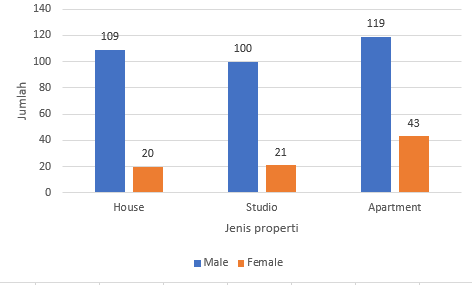

Hasil analisa menunjukan pria lebih banyak melakukan peminjaman kepada bank pada semua tipe properti dengan informasi lebih lengkap sebagai berikut :
- Tipe properti tertinggi hingga terendah pada pria adalah apartment, house, studio dengan catatan tingkat perbedaan jumlah tidak terlalu signifikan.
- Tipe properti pada wanita dari tertinggi hingga terendah adalah apartment, studio, house. Dengan catatan, jumlah apartment secara signifikan lebih tinggi dibandingkan tipe properti lainnya. 

Berdasarkan hasil analisa diatas, peneliti menyarankan untuk menjadikan nasabah pria sebagai target penawaran pinjaman kepada bank pada semua tipe properti dan menjadikan apartment sebagai tipe properti yang ditawarkan kepada nasabah wanita.

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam 

In [63]:
fe_final.groupby(["married", "loan_term_year"])["loan_status"].count()

married  loan_term_year
0        3                   2
         10                  1
         15                  6
         25                  3
         30                138
         40                  7
1        1                   1
         7                   3
         10                  1
         15                 19
         20                  2
         25                  5
         30                219
         40                  5
Name: loan_status, dtype: int64

married (No = 0, Yes = 1)

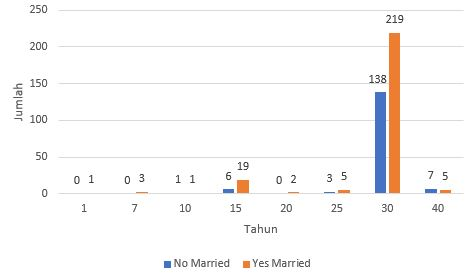

Hasil analisa menunjukan masa pinjaman selama 30 tahun paling banyak diminati, khususnya pada nasabah yang telah menikah dan pada posisi kedua nasabah yang telah menikah memilih masa pinjaman selama 15 tahun dan nasabah yang belum menikah memilih masa pinjaman selama 40 tahun.

Berdasarkan hasil analisa diatas, peneliti menyarankan untuk menjadikan masa pinjaman 30 tahun sebagai penawaran ideal dalam peminjaman untuk properti di Bank.

Kesimpulan Akhir

   Berdasarkan analisa yang telah dilakukan maka peneliti mengambil kesimpulan nasabah peminjaman pada bank untuk semua tipe properti didominasi oleh pria yang telah menikah maupun tidak dengan masa pinjaman didominasi selama 30 tahun dan bank dapat menargetkan nasabah pria yang telah menikah maupun tidak untuk diberikan penawaran peminjaman bagi pembelian semua tipe properti dengan masa pinjaman 30 tahun.